# ARMA and ARIMA models

In [1]:
library(astsa)
library(TSA)
library(caschrono)
library(forecast)


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.Arima       TSA     
  fitted.fracdiff    fracdiff
  plot.Arima         TSA     
  residuals.fracdiff fracdiff

Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



In [2]:
options(repr.plot.width=4, repr.plot.height=4, cex = 0.3)

In [41]:
set.seed=1007   # to keep
x = arima.sim(list(order = c(1,0,1),ar=5/6, ma = -1/6), n = 1000,sd=1)
xfit<-arima(x,order = c(1,0,1))
summary(xfit)


Call:
arima(x = x, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0,8370  -0,0976    -0,0109
s.e.  0,0212   0,0383     0,1714

sigma^2 estimated as 0,9685:  log likelihood = -1403,45,  aic = 2812,91

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE     MASE
Training set -0,000889843 0,984121 0,7871293 116,7682 236,9334 0,941636
                     ACF1
Training set -0,000777087


In [42]:
xhat<- fitted(xfit)
xres<- resid(xfit)
xfit$coef

ar1         ma1   intercept 
 0,83695519 -0,09759720 -0,01094676

ACF,PACF
"0,00","0,00"
"0,02","0,02"
"-0,01","-0,01"
"0,01","0,01"
"-0,07","-0,07"
"-0,06","-0,06"
"0,04","0,05"
"0,04","0,04"
"-0,02","-0,02"
"0,06","0,05"


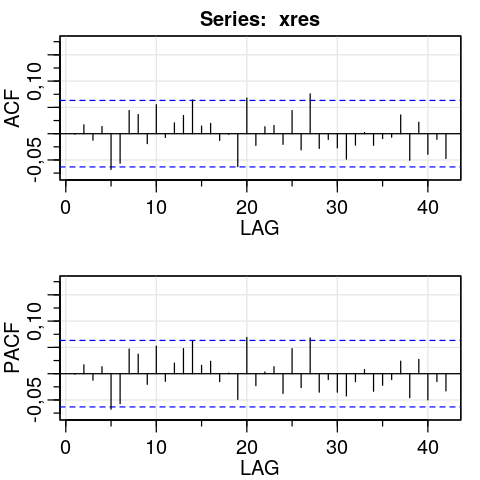

In [43]:
acf2(xres)

In [44]:
Box.test(xres,lag=10,fitdf=2) # default=Box-Pierce
# Box.test(xres,lag=10,type="Box-Pierce",fitdf=2)
# Box.test(xres,lag=10,type="Ljung-Box",fitdf=2)


	Box-Pierce test

data:  xres
X-squared = 15,061, df = 8, p-value = 0,05798


#### COMMENTS
The residuals in both ACF and PACF seem to be random and not correlated! Good! There are some tests to quantify that next.

In [45]:
Box.test(xres,lag=10,type="Box-Pierce",fitdf=2) #Box-Pierce is also default test


	Box-Pierce test

data:  xres
X-squared = 15,061, df = 8, p-value = 0,05798


In [46]:
Box.test(xres,lag=10,type="Ljung-Box",fitdf=2)


	Box-Ljung test

data:  xres
X-squared = 15,193, df = 8, p-value = 0,05549


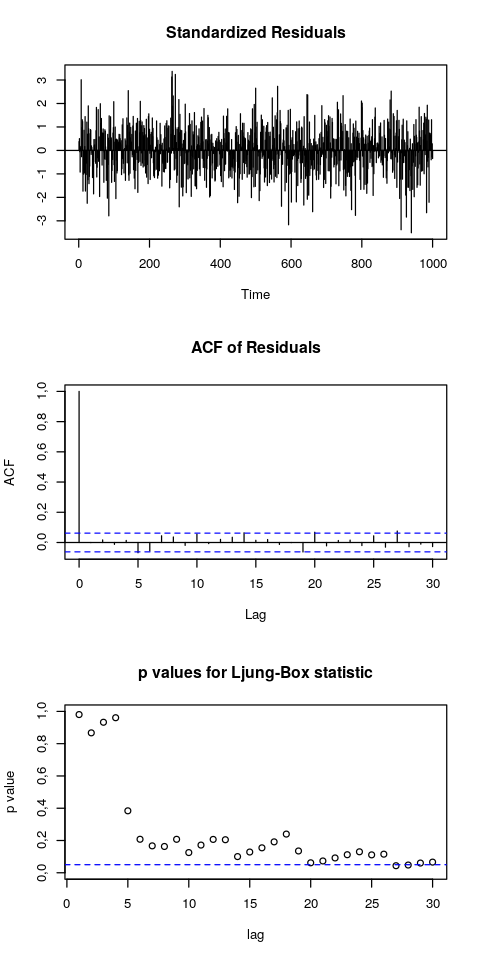

In [47]:
options(repr.plot.width=4, repr.plot.height=8, cex = 0.3)
tsdiag(xfit,gof.lag = 30)

#### COMMENTS
All good, I guess??...

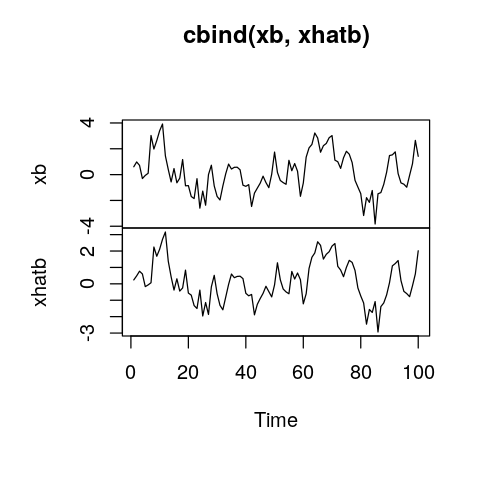

In [66]:
# to see the fit quality on a part
xb<-as.ts(x[1:100])
xhatb<-as.ts(xhat[1:100])
plot(cbind(xb,xhatb),col=c(1,2))

### Forecasting and predicting next!

In [68]:
x.pr = predict(xfit, nhead=20)


In [69]:
U = x.pr$pred + x.pr$se
L = x.pr$pred - x.pr$se
minx = min(x,L)
maxx = max(x,U)

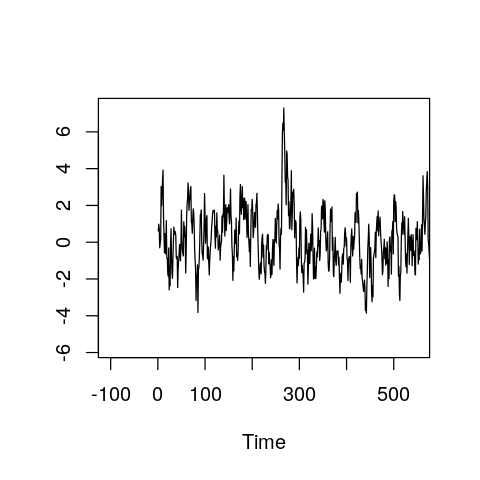

In [74]:
options(repr.plot.width=4, repr.plot.height=4, cex = 0.3)

ts.plot(x, x.pr$pred, xlim = c(-100,550), ylim = c(minx,maxx))
lines(x.pr$pred, col = 'red', type = 'o')
lines(U, col = 'blue', lty = 'dashed')
lines(L, col = 'green', lty = 'dashed')


In [75]:
model_auto<-auto.arima(x)
model_auto

Series: x 
ARIMA(0,1,3) 

Coefficients:
          ma1      ma2      ma3
      -0,2291  -0,1164  -0,1563
s.e.   0,0322   0,0358   0,0356

sigma^2 estimated as 1,023:  log likelihood=-1427,57
AIC=2863,15   AICc=2863,19   BIC=2882,77

ACF,PACF
"0,92","0,92"
"0,78","-0,44"
"0,63","-0,05"
"0,48","-0,02"
"0,36","0,07"
"0,26","-0,03"
"0,18","-0,03"
"0,13","0,04"
"0,09","0,05"
"0,07","-0,02"



Call:
ar.ols(x = rec, order.max = 2, demean = F, intercept = TRUE)

Coefficients:
      1        2  
 1,3541  -0,4632  

Intercept: 6,737 (1,111) 

Order selected 2  sigma^2 estimated as  89,72

$x.mean
[1] 1,110599

$ar
[1] 0,04178901 0,04187942

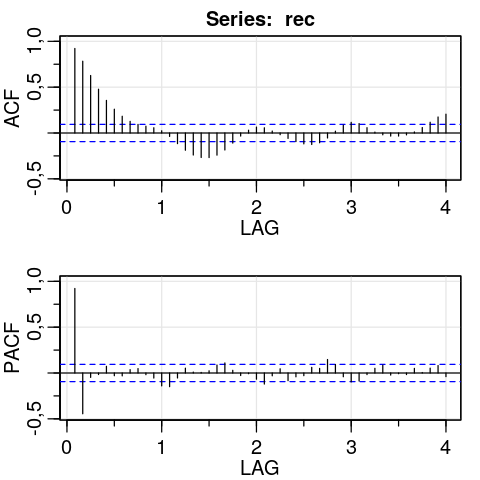

ACF,PACF
"-0,02","-0,02"
"0,02","0,02"
"0,06","0,06"
"-0,08","-0,08"
"0,00","0,00"
"0,04","0,04"
"-0,01","0,00"
"-0,06","-0,06"
"-0,02","-0,03"
"-0,02","-0,01"


[1] 62,23455

[1] 62,26278

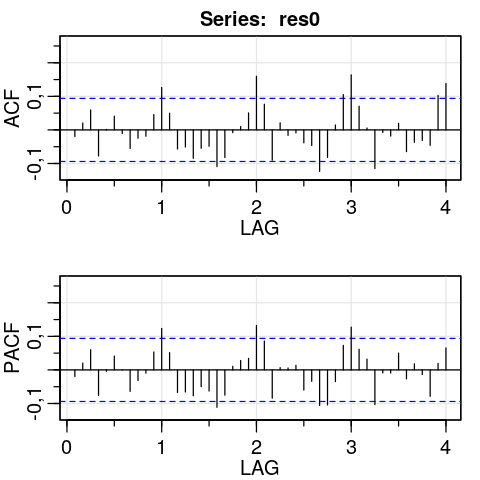

In [76]:
#########################
# Model estimation for an ar(2) to model rec (Recruitment variable)
# 453 months over the years 1950-1987

# Using regression
acf2(rec, 48)     # will produce values and a graphic 
(regr = ar.ols(rec, order=2, demean=F, intercept=TRUE))  # regression
regr$asy.se.coef  # standard errors 
res0<- regr$resid
acf2(res0)
mean(fitted(regr)[-(1:2)])
mean(x=rec)

In [77]:

# Using Yule-Walker
rec.yw = ar.yw(rec, order=2)
rec.yw$x.mean  # = 62.26278 (mean estimate)
rec.yw$ar      # = 1.3315874, -.4445447  (parameter estimates)
sqrt(diag(rec.yw$asy.var.coef))  # = .04222637, .04222637  (standard errors)
rec.yw$var.pred  # = 94.79912 (error variance estimate)

[1] 62,26278

[1]  1,3315874 -0,4445447

[1] 0,04222637 0,04222637

[1] 94,79912

In [78]:

(rec.pr$se)


ERROR: Error in eval(expr, envir, enclos): object 'rec.pr' not found


[1] 62,26278

[1] 62,24263

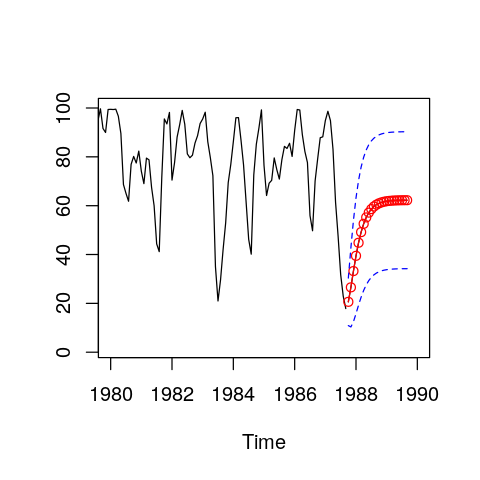

In [79]:

rec.pr = predict(rec.yw, n.ahead=24)
U = rec.pr$pred + rec.pr$se
L = rec.pr$pred - rec.pr$se
minx = min(rec,L); maxx = max(rec,U)
ts.plot(rec, rec.pr$pred, xlim=c(1980,1990), ylim=c(minx,maxx)) 
lines(rec.pr$pred, col="red", type="o")
lines(U, col="blue", lty="dashed")
lines(L, col="blue", lty="dashed")
mean(rec)
rec.pr$pred[24]  # to be conmpared with the previous line result



In [80]:
# Using mle for ar
rec.mle = ar.mle(rec, order=2)
rec.mle$x.mean
rec.mle$ar
sqrt(diag(rec.mle$asy.var.coef))
rec.mle$var.pred

[1] 62,26153

[1]  1,3512809 -0,4612736

[1] 0,04099159 0,04099159

[1] 89,33597

In [81]:
# perso: using general arima
rec_arima<- arima(rec,order=c(2,0,0))
summary(rec_arima)
rec_arima<- arima(rec,order=c(2,0,0),method="ML")
summary(rec_arima)
rec_arima<- arima(rec,order=c(2,0,0),method="CSS")
summary(rec_arima)


Call:
arima(x = rec, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1,3512  -0,4612    61,8585
s.e.  0,0416   0,0417     4,0039

sigma^2 estimated as 89,33:  log likelihood = -1661,51,  aic = 3329,02

Training set error measures:


ERROR: Error in .cbind.ts(list(e1, e2), c(deparse(substitute(e1))[1L], deparse(substitute(e2))[1L]), : not all series have the same frequency
